In [41]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("churndata.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
(df.customerID.unique()).size

7043

In [44]:
df.shape

(7043, 21)

In [45]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [57]:
df = df[pd.to_numeric(df['TotalCharges'], errors ='coerce').notnull()]
df['TotalCharges'] = df['TotalCharges'].astype('float')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [58]:
df.shape

(7032, 21)

In [59]:
X=df.iloc[:,1:20]
X[0:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [60]:
y=df.iloc[:,20]
y[0:5]

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [51]:
print(df.gender.unique())
print(df.Partner.unique())
print(df.Dependents.unique())
print(df.PhoneService.unique())
print(df.MultipleLines.unique())
print(df.InternetService.unique())
print(df.OnlineSecurity.unique())
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.TechSupport.unique())
print(df.StreamingTV.unique())
print(df.StreamingMovies.unique())
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.Contract.unique())
print(df.PaperlessBilling.unique())
print(df.PaymentMethod.unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [52]:
X[0:2]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50


In [53]:
from sklearn import preprocessing
le_garr= preprocessing.LabelEncoder()
le_garr.fit(X.gender.unique())
X.iloc[:,0] = le_garr.transform(X.iloc[:,0]) 

le_dep= preprocessing.LabelEncoder()
le_dep.fit(X.Dependents.unique())
X.iloc[:,3]= le_dep.transform(X.iloc[:,3]) 


le_psar= preprocessing.LabelEncoder()
le_psar.fit(X.PhoneService.unique())
X.iloc[:,5] = le_psar.transform(X.iloc[:,5]) 

le_mul= preprocessing.LabelEncoder()
le_mul.fit(X.MultipleLines.unique())
X.iloc[:,6] = le_mul.transform(X.iloc[:,6]) 

le_iser= preprocessing.LabelEncoder()
le_iser.fit(X.InternetService.unique())
X.iloc[:,7] = le_iser.transform(X.iloc[:,7]) 

le_osec= preprocessing.LabelEncoder()
le_osec.fit(X.OnlineSecurity.unique())
X.iloc[:,8] = le_osec.transform(X.iloc[:,8]) 

le_oba= preprocessing.LabelEncoder()
le_oba.fit(X.OnlineBackup.unique())
X.iloc[:,9] = le_oba.transform(X.iloc[:,9]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(X.DeviceProtection.unique())
X.iloc[:,10]= le_dpr.transform(X.iloc[:,10]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(X.TechSupport.unique())
X.iloc[:,11] = le_dpr.transform(X.iloc[:,11]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(X.StreamingTV.unique())
X.iloc[:,12] = le_dpr.transform(X.iloc[:,12]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(X.StreamingMovies.unique())
X.iloc[:,13] = le_dpr.transform(X.iloc[:,13]) 



In [54]:
le_ptnr= preprocessing.LabelEncoder()
le_ptnr.fit(X.Partner.unique())
X.iloc[:,2] = le_ptnr.transform(X.iloc[:,2]) 

In [55]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,One year,No,Mailed check,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65


In [56]:
le_cnt= preprocessing.LabelEncoder()
le_cnt.fit(X.Contract.unique())
X.iloc[:,14] = le_cnt.transform(X.iloc[:,14]) 

le_pbil= preprocessing.LabelEncoder()
le_pbil.fit(X.PaperlessBilling.unique())
X.iloc[:,15] = le_pbil.transform(X.iloc[:,15]) 

le_pmet= preprocessing.LabelEncoder()
le_pmet.fit(X.PaymentMethod.unique())
X.iloc[:,16] = le_pmet.transform(X.iloc[:,16]) 

In [27]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [28]:
X.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000


In [29]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.00943013, -0.44032709,  1.03561683, -0.65230493, -1.28024804,
        -3.05633383,  0.0626661 , -1.18361379, -0.91783746,  1.24287458,
        -1.02698755, -0.92426659, -1.11263165, -1.12150139, -0.82673477,
         0.82893915,  0.39980518, -1.16169394, -0.99419409],
       [ 0.99065797, -0.44032709, -0.9656081 , -0.65230493,  0.06430269,
         0.32718939, -0.99156363, -1.18361379,  1.40801227, -1.02899806,
         1.24544054, -0.92426659, -1.11263165, -1.12150139,  0.37392589,
        -1.20636117,  1.33663626, -0.26087792, -0.17373982],
       [ 0.99065797, -0.44032709, -0.9656081 , -0.65230493, -1.23950408,
         0.32718939, -0.99156363, -1.18361379,  1.40801227,  1.24287458,
        -1.02698755, -0.92426659, -1.11263165, -1.12150139, -0.82673477,
         0.82893915,  1.33663626, -0.36392329, -0.95964911],
       [ 0.99065797, -0.44032709, -0.9656081 , -0.65230493,  0.51248626,
        -3.05633383,  0.0626661 , -1.18361379,  1.40801227, -1.02899806,
         1.245

In [32]:
le_churn= preprocessing.LabelEncoder()
le_churn.fit(y.unique())
y[:] = le_churn.transform(y[:]) 


In [33]:
y=np.asarray(y[:]).astype(int)
y[0:5]

array([0, 0, 1, 0, 1])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5625, 19) (5625,)
Test set: (1407, 19) (1407,)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 1, 1])

In [37]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.90872175, 0.09127825],
       [0.6843868 , 0.3156132 ],
       [0.9399502 , 0.0600498 ],
       [0.36329741, 0.63670259],
       [0.42377758, 0.57622242]])

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[206 169]
 [111 921]]


Confusion matrix, without normalization
[[206 169]
 [111 921]]


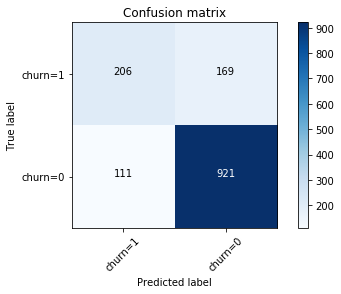

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [40]:
print (classification_report(y_test, yhat))


             precision    recall  f1-score   support

          0       0.84      0.89      0.87      1032
          1       0.65      0.55      0.60       375

avg / total       0.79      0.80      0.80      1407



In [40]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5164297928114137

In [38]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.75

In [41]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7603490977709636